In [1]:
#Importing libraries
import  requests
from bs4 import BeautifulSoup
import pandas as pd

### download_data Function: This function takes a URL as input, sends an HTTP GET request to that URL, and returns a BeautifulSoup object containing the parsed HTML content if the response status code is 200 (indicating success). If the status code is not 200, it prints an error message and returns None.

In [2]:
def download_data(url):
    r = requests.get(url)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'html.parser')
        return soup
    else:
        print(f"Failed to fetch data from {url}. Status code: {r.status_code}")
        return None


### get_book_urls Function: This function takes a page URL as input, downloads the HTML content of that page, and extracts the URLs of all books listed on that page. It constructs the full book URLs by appending the relative paths extracted from the HTML to the base URL. It returns a list of book URLs.

In [3]:
def get_book_urls(page_url):
    soup = download_data(page_url)
    if not soup:
        return []

    base_url = 'https://books.toscrape.com/catalogue/'
    links = [base_url + item.h3.a['href'] for item in soup.find_all('article', class_='product_pod')]
    return links

### get_book_data Function: This function takes a book URL as input, downloads the HTML content of the book's page, and extracts specific information about the book, such as title, price, availability, genre, ratings, and additional details. It constructs a dictionary containing these details and returns it.

In [4]:
def get_book_data(book_url):
    soup = download_data(book_url)
    if not soup:
        return {}

    title = soup.find('h1').text
    price = soup.find(class_='price_color').text
    availability = soup.find(class_='availability').text.strip()
    genre = soup.find(class_='breadcrumb').find_all('li')[2].text
    ratings = soup.find('p', class_='star-rating')['class'][1]
    more_details = {row.find('th').text: row.find('td').text for row in soup.find('table').find_all('tr')}

    result = {
        'Title': title,
        'Price': price,
        'Availability': availability,
        'Genre': genre,
        'Ratings': ratings
    }
    result.update(more_details)

    return result

### The script defines the base URL pattern for the book listing pages (base_url).
It initializes an empty list to store the data of all books (all_books_data).
It iterates over page numbers from 1 to 50 using a for loop.
For each page, it constructs the URL using the base URL pattern and the current page number.
It calls the get_book_urls function to extract the book URLs from the current page.
For each book URL obtained, it calls the get_book_data function to extract the book data and appends it to the all_books_data list.
After iterating over all pages and collecting the book data, it converts the list of dictionaries (all_books_data) into a DataFrame using Pandas.
Finally, it prints the DataFrame containing the scraped book data.

In [5]:
# Scrape all pages
base_url = "https://books.toscrape.com/catalogue/page-{}.html"
all_books_data = []

for page_number in range(1, 51):  # iterates over page numbers from 1 to 50 using a for loop.
    page_url = base_url.format(page_number)
    book_urls = get_book_urls(page_url)
    for book_url in book_urls:
        book_data = get_book_data(book_url)
        all_books_data.append(book_data)
        
# Convert the data to a DataFrame
df = pd.DataFrame(all_books_data)

In [6]:
# Display the DataFrame
print(df)

                                                 Title    Price  \
0                                 A Light in the Attic  Â£51.77   
1                                   Tipping the Velvet  Â£53.74   
2                                           Soumission  Â£50.10   
3                                        Sharp Objects  Â£47.82   
4                Sapiens: A Brief History of Humankind  Â£54.23   
..                                                 ...      ...   
995  Alice in Wonderland (Alice's Adventures in Won...  Â£55.53   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)  Â£57.06   
997  A Spy's Devotion (The Regency Spies of London #1)  Â£16.97   
998                1st to Die (Women's Murder Club #1)  Â£53.98   
999                 1,000 Places to See Before You Die  Â£26.08   

                Availability                   Genre Ratings  \
0    In stock (22 available)              \nPoetry\n   Three   
1    In stock (20 available)  \nHistorical Fiction\n     One   
2  

In [7]:
df = pd.DataFrame(all_books_data)
df.head()

,Title,Price,Availability,Genre,Ratings,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Number of reviews
0,A Light in the Attic,Â£51.77,In stock (22 available),\nPoetry\n,Three,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,0
1,Tipping the Velvet,Â£53.74,In stock (20 available),\nHistorical Fiction\n,One,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,0
2,Soumission,Â£50.10,In stock (20 available),\nFiction\n,One,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,0
3,Sharp Objects,Â£47.82,In stock (20 available),\nMystery\n,Four,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,0
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock (20 available),\nHistory\n,Five,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,0


DATA CLEANING

In [8]:
df.shape

(1000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              1000 non-null   object
 1   Price              1000 non-null   object
 2   Availability       1000 non-null   object
 3   Genre              1000 non-null   object
 4   Ratings            1000 non-null   object
 5   UPC                1000 non-null   object
 6   Product Type       1000 non-null   object
 7   Price (excl. tax)  1000 non-null   object
 8   Price (incl. tax)  1000 non-null   object
 9   Tax                1000 non-null   object
 10  Number of reviews  1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [10]:
df.columns = df.columns.str.lower()

In [11]:
# Remove unwanted characters from 'Price' column
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True)
df['price (excl. tax)'] = df['price (excl. tax)'].str.replace(r'[^\d.]', '', regex=True)
df['price (incl. tax)'] = df['price (incl. tax)'].str.replace(r'[^\d.]', '', regex=True)
df['tax'] = df['tax'].str.replace(r'[^\d.]', '', regex=True)

In [12]:
df.ratings.unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

In [13]:
# Define the mapping dictionary
rating_mapping = {'Three': 3, 'One': 1, 'Four': 4, 'Five': 5, 'Two': 2}

# Replace values in the 'Ratings' column using the mapping dictionary
df['ratings'] = df['ratings'].replace(rating_mapping).infer_objects(copy=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_7232\1153539195.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ratings'] = df['ratings'].replace(rating_mapping).infer_objects(copy=False)


In [14]:
# Convert 'Price' column to float
df['price'] = df['price'].astype(float)
df['price (incl. pax)'] = df['price (incl. tax)'].astype(float)
df['price (excl. pax)'] = df['price (excl. tax)'].astype(float)
df['tax'] = df['tax'].astype(float)

# Convert 'Number of reviews' column to int
df['number of reviews'] = df['number of reviews'].astype(int)

# Convert 'Ratings' column to int
df['ratings'] = df['ratings'].astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   price              1000 non-null   float64
 2   availability       1000 non-null   object 
 3   genre              1000 non-null   object 
 4   ratings            1000 non-null   int32  
 5   upc                1000 non-null   object 
 6   product type       1000 non-null   object 
 7   price (excl. tax)  1000 non-null   object 
 8   price (incl. tax)  1000 non-null   object 
 9   tax                1000 non-null   float64
 10  number of reviews  1000 non-null   int32  
 11  price (incl. pax)  1000 non-null   float64
 12  price (excl. pax)  1000 non-null   float64
dtypes: float64(4), int32(2), object(7)
memory usage: 93.9+ KB


In [16]:
df.genre.unique()

array(['\nPoetry\n', '\nHistorical Fiction\n', '\nFiction\n',
       '\nMystery\n', '\nHistory\n', '\nYoung Adult\n', '\nBusiness\n',
       '\nDefault\n', '\nSequential Art\n', '\nMusic\n',
       '\nScience Fiction\n', '\nPolitics\n', '\nTravel\n',
       '\nThriller\n', '\nFood and Drink\n', '\nRomance\n',
       '\nChildrens\n', '\nNonfiction\n', '\nArt\n', '\nSpirituality\n',
       '\nPhilosophy\n', '\nNew Adult\n', '\nContemporary\n',
       '\nFantasy\n', '\nAdd a comment\n', '\nScience\n', '\nHealth\n',
       '\nHorror\n', '\nSelf Help\n', '\nReligion\n', '\nChristian\n',
       '\nCrime\n', '\nAutobiography\n', '\nChristian Fiction\n',
       '\nBiography\n', '\nWomens Fiction\n', '\nErotica\n',
       '\nCultural\n', '\nPsychology\n', '\nHumor\n', '\nHistorical\n',
       '\nNovels\n', '\nShort Stories\n', '\nSuspense\n', '\nClassics\n',
       '\nAcademic\n', '\nSports and Games\n', '\nAdult Fiction\n',
       '\nParenting\n', '\nParanormal\n'], dtype=object)

In [17]:
df['genre'] = df['genre'].str.strip()

In [18]:
df.genre.unique()

array(['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History',
       'Young Adult', 'Business', 'Default', 'Sequential Art', 'Music',
       'Science Fiction', 'Politics', 'Travel', 'Thriller',
       'Food and Drink', 'Romance', 'Childrens', 'Nonfiction', 'Art',
       'Spirituality', 'Philosophy', 'New Adult', 'Contemporary',
       'Fantasy', 'Add a comment', 'Science', 'Health', 'Horror',
       'Self Help', 'Religion', 'Christian', 'Crime', 'Autobiography',
       'Christian Fiction', 'Biography', 'Womens Fiction', 'Erotica',
       'Cultural', 'Psychology', 'Humor', 'Historical', 'Novels',
       'Short Stories', 'Suspense', 'Classics', 'Academic',
       'Sports and Games', 'Adult Fiction', 'Parenting', 'Paranormal'],
      dtype=object)

In [19]:
df.tax.unique()

array([0.])

In [20]:
#df.drop(['UPC', 'number of reviews', 'tax'], axis=1, inplace=True)

df.head()

,title,price,availability,genre,ratings,upc,product type,price (excl. tax),price (incl. tax),tax,number of reviews,price (incl. pax),price (excl. pax)
0,A Light in the Attic,51.77,In stock (22 available),Poetry,3,a897fe39b1053632,Books,51.77,51.77,0.0,0,51.77,51.77
1,Tipping the Velvet,53.74,In stock (20 available),Historical Fiction,1,90fa61229261140a,Books,53.74,53.74,0.0,0,53.74,53.74
2,Soumission,50.10,In stock (20 available),Fiction,1,6957f44c3847a760,Books,50.10,50.10,0.0,0,50.10,50.10
3,Sharp Objects,47.82,In stock (20 available),Mystery,4,e00eb4fd7b871a48,Books,47.82,47.82,0.0,0,47.82,47.82
4,Sapiens: A Brief History of Humankind,54.23,In stock (20 available),History,5,4165285e1663650f,Books,54.23,54.23,0.0,0,54.23,54.23


In [21]:
def extract_num(string):
    return int(string.split('(')[1][:2])

df['stock_count'] = df['availability'].apply(lambda x: extract_num(x))

In [27]:
df.head()

,title,price,genre,ratings,product type,price (excl. tax),price (incl. tax),number of reviews,price (incl. pax),price (excl. pax),stock_count
0,A Light in the Attic,51.77,Poetry,3,Books,51.77,51.77,0,51.77,51.77,22
1,Tipping the Velvet,53.74,Historical Fiction,1,Books,53.74,53.74,0,53.74,53.74,20
2,Soumission,50.10,Fiction,1,Books,50.10,50.10,0,50.10,50.10,20
3,Sharp Objects,47.82,Mystery,4,Books,47.82,47.82,0,47.82,47.82,20
4,Sapiens: A Brief History of Humankind,54.23,History,5,Books,54.23,54.23,0,54.23,54.23,20


In [26]:
df.drop(['availability','upc', 'tax','availability'], axis=1, inplace=True)

In [29]:
df.describe()

,price,ratings,number of reviews,price (incl. pax),price (excl. pax),stock_count
count,1000.00000,1000.000000,1000.0,1000.00000,1000.00000,1000.000000
mean,35.07035,2.923000,0.0,35.07035,35.07035,8.585000
std,14.44669,1.434967,0.0,14.44669,14.44669,5.654622
min,10.00000,1.000000,0.0,10.00000,10.00000,1.000000
25%,22.10750,2.000000,0.0,22.10750,22.10750,3.000000
50%,35.98000,3.000000,0.0,35.98000,35.98000,7.000000
75%,47.45750,4.000000,0.0,47.45750,47.45750,14.000000
max,59.99000,5.000000,0.0,59.99000,59.99000,22.000000


EDA

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

genre
Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Contem

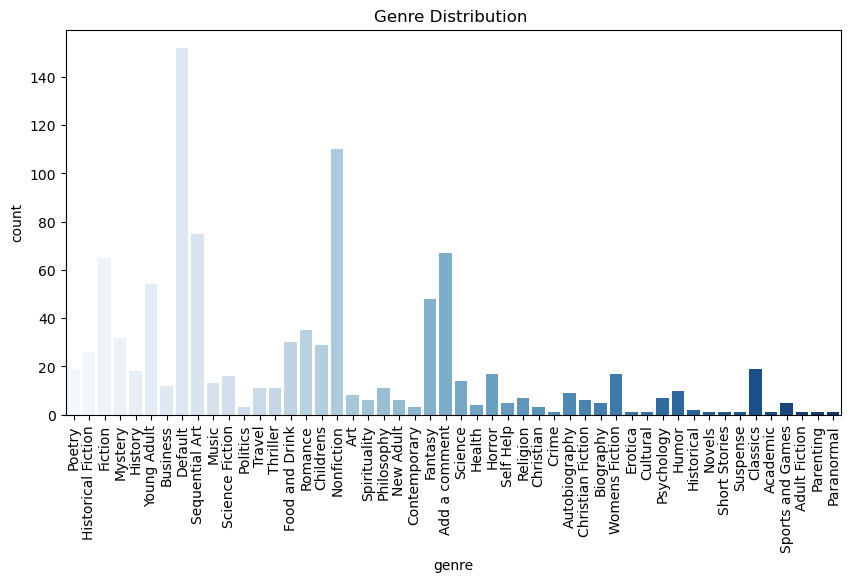

In [36]:
# 1. Total number of books by Genre
print(df['genre'].value_counts())

# Plotting the distribution
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="genre", data=df, palette="Reds")
plt.title('Genre Distribution ')
plt.xticks(rotation=90)
#ax.bar_label(ax.containers[0])

plt.show()
df_top15.plot(kind='barh', figsize=(12, 12), color='navy')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')


In [38]:
# 2. Which genre has the highest average price?
average_price_by_genre = df.groupby('genre')['price'].mean().sort_values(ascending=False)
highest_avg_price_genre = average_price_by_genre.idxmax()
highest_avg_price = average_price_by_genre.max()

print(f"Genre with the highest average price: {highest_avg_price_genre} ({highest_avg_price:.2f})")


Genre with the highest average price: Suspense (58.33)


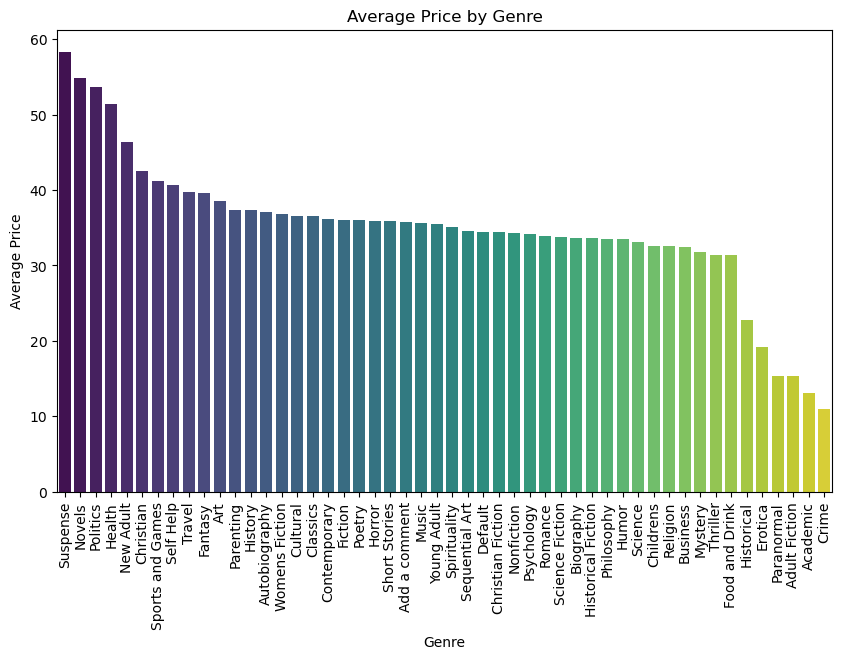

In [40]:
# Plotting the average price by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_genre.index, y=average_price_by_genre.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Price by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Price')
plt.show()

Total stock count per genre:
genre
Default               1345
Nonfiction             975
Sequential Art         686
Fiction                588
Add a comment          516
Young Adult            464
Fantasy                372
Food and Drink         319
Mystery                290
Romance                269
Poetry                 235
Childrens              229
Historical Fiction     194
History                181
Horror                 136
Business               133
Science Fiction        125
Thriller               119
Music                  111
Science                105
Womens Fiction          91
Travel                  89
Humor                   84
Philosophy              82
Art                     72
Spirituality            69
Religion                60
Self Help               59
Autobiography           57
Classics                55
Christian Fiction       55
Psychology              52
Health                  49
New Adult               49
Politics                45
Biography           

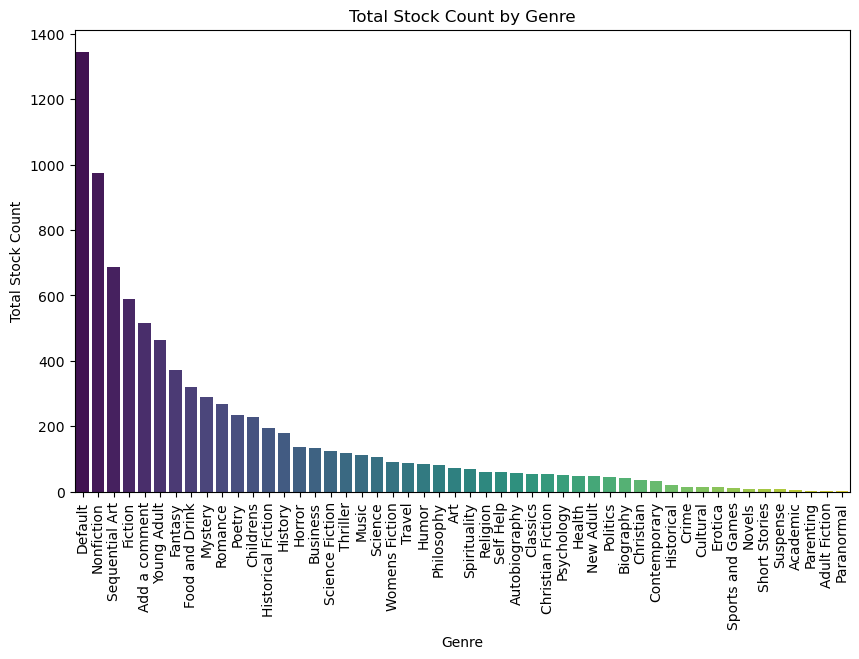

In [47]:
# 3. What is the total stock count per genre?
total_stock_count_by_genre = df.groupby('genre')['stock_count'].sum().sort_values(ascending=False)

print("Total stock count per genre:")
print(total_stock_count_by_genre)

# Plotting the average stock count by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=average_stock_count_by_genre.index, y=average_stock_count_by_genre.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Stock Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Stock Count')
plt.show()


In [ ]:
Insights: Default Genre has the highest stock count at 1,345 conversely Paranormal Genre has the lowest at 1

In [43]:
# 4. What is the correlation between ratings and price?
correlation_ratings_price = df['ratings'].corr(df['price'])

print(f"Correlation between ratings and price: {correlation_ratings_price:.2f}")

Correlation between ratings and price: 0.03


In [45]:
df.to_csv('books.csv')

Import Libraries: The script starts by importing the necessary libraries, requests for making HTTP requests and BeautifulSoup from bs4 for parsing HTML.

download_data Function: This function takes a URL as input, sends an HTTP GET request to that URL, and returns a BeautifulSoup object containing the parsed HTML content if the response status code is 200 (indicating success). If the status code is not 200, it prints an error message and returns None.

get_book_urls Function: This function takes a page URL as input, downloads the HTML content of that page, and extracts the URLs of all books listed on that page. It constructs the full book URLs by appending the relative paths extracted from the HTML to the base URL. It returns a list of book URLs.

get_book_data Function: This function takes a book URL as input, downloads the HTML content of the book's page, and extracts specific information about the book, such as title, price, availability, genre, ratings, and additional details. It constructs a dictionary containing these details and returns it.

Main Code:

The script defines the base URL pattern for the book listing pages (base_url).
It initializes an empty list to store the data of all books (all_books_data).
It iterates over page numbers from 1 to 50 using a for loop.
For each page, it constructs the URL using the base URL pattern and the current page number.
It calls the get_book_urls function to extract the book URLs from the current page.
For each book URL obtained, it calls the get_book_data function to extract the book data and appends it to the all_books_data list.
After iterating over all pages and collecting the book data, it converts the list of dictionaries (all_books_data) into a DataFrame using Pandas.
Finally, it prints the DataFrame containing the scraped book data.